# Example of the `aitlas` toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the `aitlas` toolbox.

## Import the required packages

In [1]:
from aitlas.datasets import ChactunDataset
from aitlas.models import DeepLabV3
from aitlas.transforms import MinMaxNormTransponse
from aitlas.utils import image_loader

## Visualize images and masks

Total number of patches: 1344


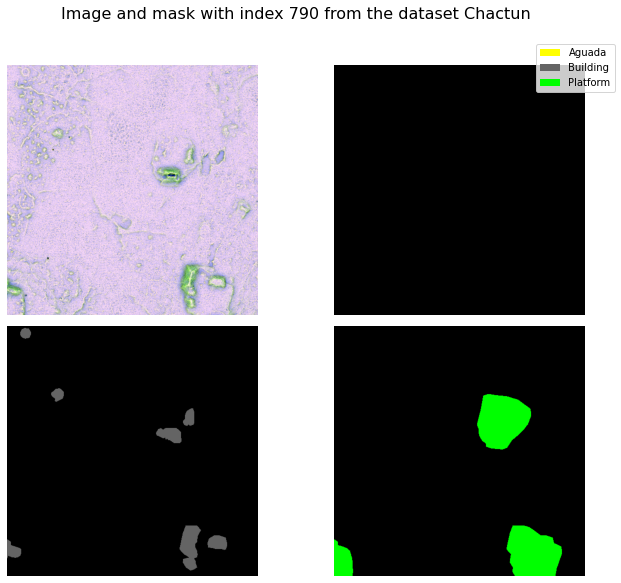

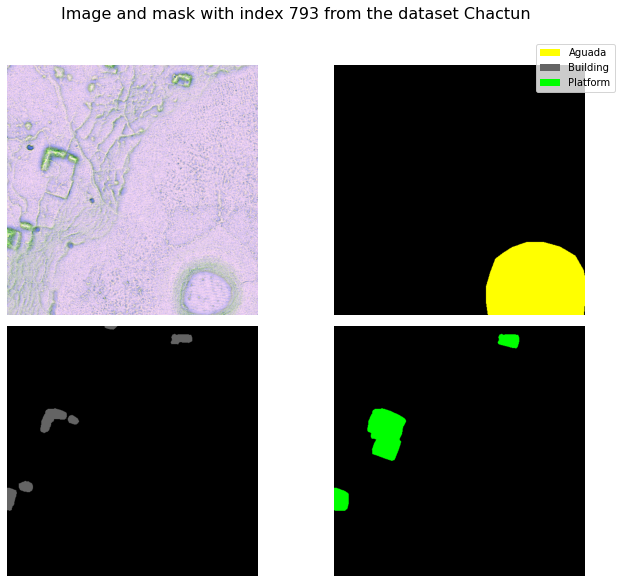

In [2]:
dataset_config = {
    "data_dir": "/media/hdd/semantic-segmentation/Chactun/train"
}
dataset = ChactunDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(790);
dataset.show_image(793);

## Load train data

In [3]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/media/ssd/chactun_new/train",
    "transforms": ["aitlas.transforms.MinMaxNormTransponse"],
    "target_transforms": ["aitlas.transforms.MinMaxNorm"]
}
train_dataset = ChactunDataset(train_dataset_config)
len(train_dataset)

1764

## Create the model

In [4]:
epochs = 5
model_directory = "/media/ssd/chactun_new/experiments/"
model_config = {
    "num_classes": 3, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [5]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
)

2021-11-29 11:55:39,874 INFO Starting training.
training: 100%|███████████████████████████████| 441/441 [26:53<00:00,  3.66s/it]
2021-11-29 12:22:34,049 INFO epoch: 1, time: 1614, loss:  0.00950
testing on train set: 100%|███████████████████| 441/441 [02:10<00:00,  3.37it/s]
2021-11-29 12:24:46,976 INFO IOU Mean:0.7362495367832558, IOU per Class:0.963718820861678, 0.659276428044554, 0.5857533614435355
training: 100%|███████████████████████████████| 441/441 [26:55<00:00,  3.66s/it]
2021-11-29 12:51:42,697 INFO epoch: 2, time: 1616, loss:  0.00607
testing on train set: 100%|███████████████████| 441/441 [02:10<00:00,  3.37it/s]
2021-11-29 12:53:53,524 INFO IOU Mean:0.7791327451921575, IOU per Class:0.9693955254578401, 0.6655294234357769, 0.7024732866828555
training: 100%|███████████████████████████████| 441/441 [26:55<00:00,  3.66s/it]
2021-11-29 13:20:49,349 INFO epoch: 3, time: 1616, loss:  0.00528
testing on train set: 100%|███████████████████| 441/441 [02:10<00:00,  3.37it/s]
2021-11-

## Evalute the model using test data

In [6]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/media/ssd/chactun_new/test",
    "transforms": ["aitlas.transforms.MinMaxNormTransponse"],
    "target_transforms": ["aitlas.transforms.MinMaxNorm"]
}

test_dataset = ChactunDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model_path = "/media/ssd/chactun_new/experiments/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(["iou"])

2021-11-29 14:22:40,976 INFO Loading checkpoint /media/ssd/chactun_new/experiments/checkpoint.pth.tar
2021-11-29 14:22:41,404 INFO Loaded checkpoint /media/ssd/chactun_new/experiments/checkpoint.pth.tar at epoch 6
testing on test set: 100%|██████████████████████| 83/83 [00:23<00:00,  3.46it/s]


[{'IOU Mean': 0.761380169346972,
  'IOU per Class': [0.9668790656156091,
   0.6636865552526114,
   0.6535748871726955]}]

## Predictions

2021-11-29 14:24:27,463 INFO Loading checkpoint /media/ssd/chactun_new/experiments/checkpoint.pth.tar
2021-11-29 14:24:27,800 INFO Loaded checkpoint /media/ssd/chactun_new/experiments/checkpoint.pth.tar at epoch 6


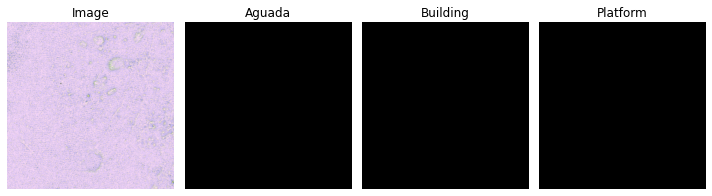

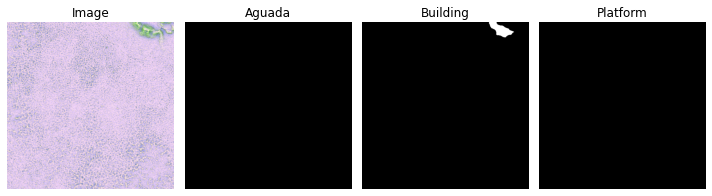

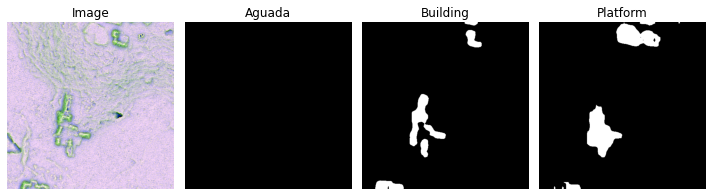

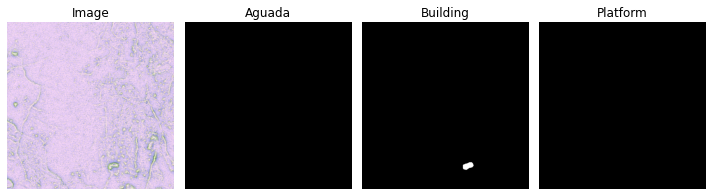

In [7]:
model_path = "/media/ssd/chactun_new/experiments/checkpoint.pth.tar"
#labels = ChactunDataset.labels
labels = ["Aguada", "Building", "Platform"]
transform = MinMaxNormTransponse()
model.load_model(model_path)

image = image_loader('/media/ssd/chactun_new/predict/tile_1741_lidar.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/media/ssd/chactun_new/predict/tile_1763_lidar.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/media/ssd/chactun_new/predict/tile_1730_lidar.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/media/ssd/chactun_new/predict/tile_1724_lidar.tif')
fig = model.predict_masks(image, labels, transform)